<a href="https://colab.research.google.com/github/vinhtq-2618/basic-ml-course/blob/lecture09/09_Computer_Vision/Simple_digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import copy

from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Load dataset
In this example, we will use MNIST dataset. Read more about it [here](http://yann.lecun.com/exdb/mnist/).

The MNIST database of handwritten digits has a total of 70,000 examples, each example is a 28x28 grayscale image.

In [ ]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
print("Number of samples:", X.shape[0])
print("Number of labels:", y.shape[0])
print("Number of features:", X.shape[1])  # 784 = 28 * 28, since the image is flattened from matrix to a 1-D vector.

Number of samples: 70000
Number of labels: 70000
Number of features: 784


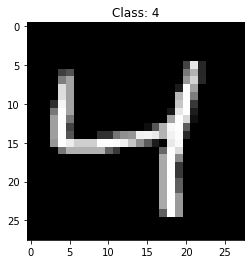

In [ ]:
# Show a sample in dataset
sample_idx = 2  # Feel free to change this number and rerun code cell to visualize other sample
sample = X[sample_idx]
sample_image = np.reshape(sample, (28, 28))
label = y[sample_idx]

plt.title(f"Class: {label}")
plt.imshow(sample_image, cmap="gray")
plt.show()

## Split dataset into train and test set

In [ ]:
seed_num = 1337
random_state = check_random_state(seed_num)  # For ensuring consistency between executions

In [ ]:
# Shuffle the dataset
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000, random_state=random_state)

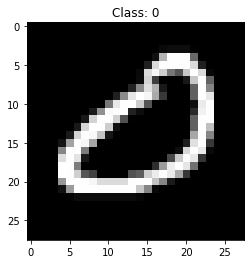

In [ ]:
sample_idx = 0  # Feel free to change this number and rerun code cell to visualize the example
sample = X_train[sample_idx]
sample_image = np.reshape(sample, (28, 28))
label = y_train[sample_idx]

plt.title(f"Class: {label}")
plt.imshow(sample_image, cmap="gray")
plt.show()

# Normalize dataset

We will use `StandardScaler` to normalize the features. Read more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

In [ ]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Train a simple Multi-layer Perception classifier

Read more about `MLPClassifier` [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

In [ ]:
# Create a Multi-layer Perception classifier
clf = MLPClassifier(
    hidden_layer_sizes=(100, 50, 10),
    random_state=random_state,
    max_iter=300,
    activation='relu',
    solver='adam'
)

In [ ]:
# Train the model with train set
clf.fit(X_train_normalized, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 10), max_iter=300,
              random_state=RandomState(MT19937) at 0x7F56532628D0)

In [ ]:
# Predict the values on test set
predictions = clf.predict(X_test_normalized)

## Visualize some predictions on test set

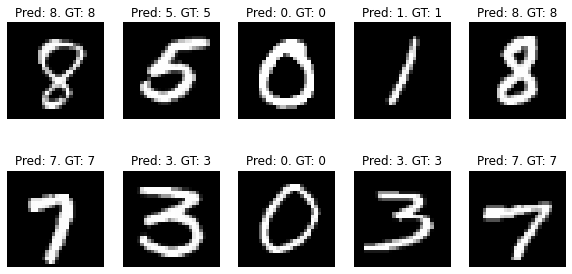

In [ ]:
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for row_idx, row in enumerate(axes):
    for col, image, prediction, gt in zip(row, X_test[row_idx * 5:row_idx * 5 + 5], predictions[row_idx * 5:row_idx * 5 + 5], y_test[row_idx * 5:row_idx * 5 + 5]):
        col.set_axis_off()
        visualize_image = image.reshape(28, 28)
        col.imshow(visualize_image, cmap="gray")
        col.set_title(f"Pred: {prediction}. GT: {gt}")

# Model accuracy

In [ ]:
print(f"Mean accuracy:", clf.score(X_test_normalized, y_test))

Mean accuracy: 0.9742


In [ ]:
print(f"Classification report for classifier {clf}:")
print(metrics.classification_report(y_test, predictions))

Classification report for classifier MLPClassifier(hidden_layer_sizes=(100, 50, 10), max_iter=300,
              random_state=RandomState(MT19937) at 0x7F56532628D0):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       969
           1       0.99      0.99      0.99      1100
           2       0.97      0.97      0.97      1014
           3       0.97      0.97      0.97      1044
           4       0.96      0.97      0.97       972
           5       0.98      0.97      0.97       886
           6       0.98      0.98      0.98       970
           7       0.98      0.97      0.98      1036
           8       0.97      0.96      0.96       985
           9       0.96      0.97      0.97      1024

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

